# Ekstremi funkcija

## Lokalni ekstremi

**Definicija 1.** _Neka je $A \subseteq \mathbb{R^n}$ otvoren, $f: A\rightarrow \mathbb{R}$ i $c \in A.$_
- _Ako postoji okolina $U(c)$ na kojoj je $f(c)$ maksimum_
$( \forall x \in U(c) \hspace{3mm} f(c) \ge f(x) ),$
_kažemo da je $c$ **lokalni maksimum**, a $f(c)$ je vrijednost lokalnog maksimuma._
- _Ako postoji okolina $U(c)$ na kojoj je $f(c)$ minimum_
$(\forall x \in U(c) \hspace{3mm} f(c) \le f(x)),$
_kažemo da je $c$ **lokalni minimum**, a $f(c)$ je vrijednost lokalnog minimuma._
- _$c$ je **lokalni ekstrem** ako je lokalni minimum ili lokalni minimum funkcije $f$._

- _$c$ je **stacionarna točka** ako je funkcija $f$ diferencijabilna u $c$ i $Df(c) = 0$_

**Lokalni maksimum:**

In [87]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import math
%matplotlib agg

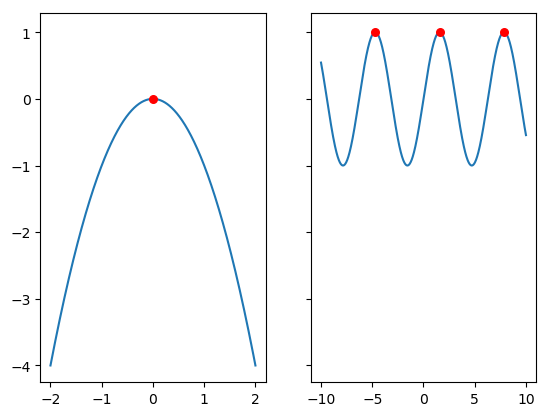

In [88]:
fig, (lijevo, desno) = plt.subplots(1, 2, sharey=True)
x = np.linspace(-2, 2, 1000)
lijevo.plot(x, -x**2,zorder=1)
lijevo.scatter(0, 0, s=30, c='r', zorder=2)

x = np.linspace(-10, 10, 1000)
desno.plot(x, np.sin(x), zorder=1)
X=[math.pi/2, math.pi/2 + 2*math.pi, math.pi/2 - 2*math.pi]
Y=[1, 1, 1]
desno.scatter(X, Y, s=30, c='r', zorder=2)

fig

**Lokalni minimum:**

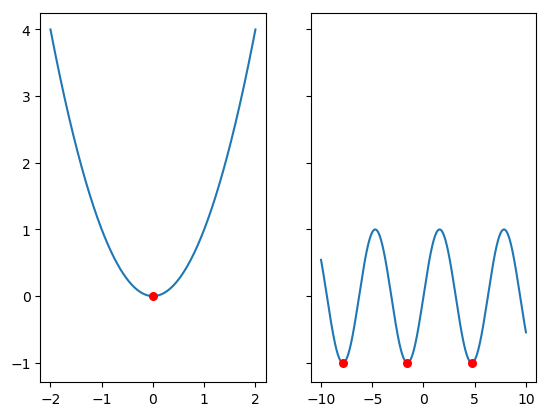

In [89]:
fig, (lijevo, desno) = plt.subplots(1, 2, sharey=True)
x = np.linspace(-2, 2, 1000)
lijevo.plot(x, x**2, zorder=1)
lijevo.scatter(0, 0, s=30, c='r', zorder=2)

x = np.linspace(-10, 10, 1000)
desno.plot(x, np.sin(x), zorder=1)
X=[-math.pi/2, -math.pi/2 + 2*math.pi, -math.pi/2 - 2*math.pi]
Y=[-1, -1, -1]
desno.scatter(X, Y, s=30, c='r', zorder=2)

fig

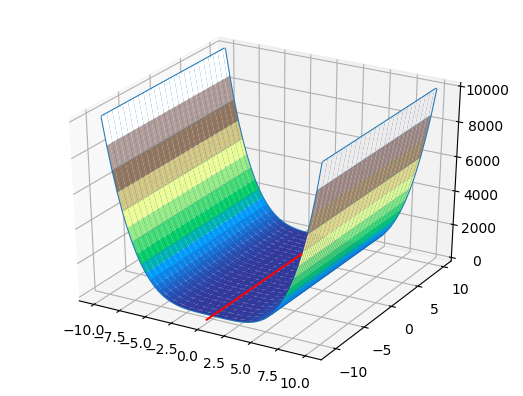

In [90]:
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
x, y = np.meshgrid(np.linspace(-10, 10), np.linspace(-10, 10))
z = x**4
ax.plot_wireframe(x, y, z, rstride=2, cstride=2)
ax.plot_surface(x, y, z, cmap='terrain', linewidth=1)

ax2 = fig.gca(projection='3d')
y = np.linspace(-11, 5.5, 100)
x = 0 * y
z = 0 
ax2.plot(x, y, z, c='r')

fig

**Teorem 2. (Nužan uvjet za lokalni ekstrem)** _Neka je $A \subseteq \mathbb{R^n}$ otvoren i $f: A\rightarrow \mathbb{R}$ diferencijabilna u $c \in A$. Ako je $c$ lokalni ekstrem funkcije $f$ onda je $Df(c)=0$ (tj. $c$ je stacionarna točka funkcije $f$)._

**Teorem 3. (Dovoljni uvjeti za lokalni ekstrem)** _Neka je $A \subseteq \mathbb{R^n}$ otvoren i $f: A\rightarrow \mathbb{R}$ klase $C^2$._
- _Ako je $c \in A$ stacionarna točka i $H_f(c)$ je negativno definitna matrica onda $f$ ima lokalni maksimum u $c$._
- _Ako $f$ ima lokalni maksimum u $c$ onda je $H_f(c)$ negativno semidefinitna._
- _Ako je $c \in A$ stacionarna točka i $H_f(c)$ je pozitivno definitna matrica onda $f$ ima lokalni minimum u $c$._
- _Ako $f$ ima lokalni minimum u $c$ onda je $H_f(c)$ pozitivno semidefinitna._
- _Ako je $c \in A$ stacionarna točka i $H_f(c)$ je indefinitna matrica onda $f$ nema u točki $c$ lokalni ekstrem, tj. $c$ je sedlasta točka funkcije $f$._

Prethodna dva teorema nam daju način **kako analitički odrediti lokalne ekstreme** neke funkcije:
1. Odredimo sve točke $c \in A$ takve da $Df(c)=0$. Po Teoremu 2. one su kandidati za lokalne ekstreme.
2. Za njih izračunamo $H_f(c)$.
3. Iskoristimo Teorem 3.

In [91]:
import sympy as sp
import numpy as np

def grad(f,var):
    return [sp.diff(f,x) for x in var]

def hess(f,var):
    return sp.Matrix([[f.diff(x).diff(y) for x in var] for y in var])

x,y = sp.symbols('x y')

def f(x,y):
    return x**2 + y**2

fsp = f(x,y)

Možemo izračunati gradijent i Hessian u nekoj točki, npr. u točki $(1,1)$ da vidimo je li u njoj lokalni ekstrem. Po obratu po kontrapoziciji Teorema 2 znamo da u $(1,1)$ nije lokalni ekstrem funkcije $f(x,y)=x^2+y^2$ jer $Df(1,1)=(2,2)$

In [92]:
[i.n(5, subs={x: 1, y: 1}) for i in grad(fsp,[x,y])]    # evaluacija gradijenta u (1,1)

[2.0000, 2.0000]

**Primjer 4.** Nađimo lokalne ekstreme funkcije $f(x,y)=x^2+y^2$.

In [93]:
def f(x,y):
    return x**2 + y**2

fsp = f(x,y)

g = grad(fsp,[x,y])
g

[2*x, 2*y]

In [94]:
stac_tocka = sp.solve(g, sp.symbols('x y'))
stac_tocka

{x: 0, y: 0}

Jedini kandidat je točka $(0,0)$.

In [95]:
h = hess(fsp,[x,y])
h   # ovisi o x i y

Matrix([
[2, 0],
[0, 2]])

In [96]:
temp = h.eigenvals()
temp

{2: 2}

In [97]:
def is_pos_def(d):
    for key in d:
        if key <= 0:
            return False
    return True

is_pos_def(temp)

True

Vidimo da je $H_f(0,0)$ pozitivno definitna pa po Teoremu 3. zaključujemo da funkcija $f$ u $(0,0)$ ima lokalni minimum. Sljedeći graf potvrđuje naš nalaz.

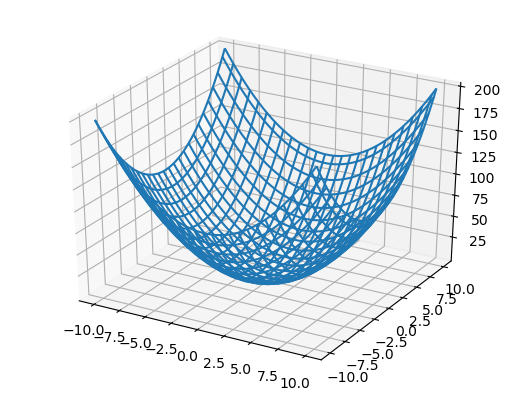

In [98]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

x, y = np.meshgrid(np.linspace(-10, 10), np.linspace(-10, 10))
z = f(x,y)

ax.plot_wireframe(x, y, z, rstride=2, cstride=2)
fig

**Primjer 5.** Nađimo lokalne ekstreme funkcije $f(x,y)=-(x-2)^2-(y+1)^2$.

In [99]:
x,y = sp.symbols('x y')

def f(x,y):
    return -(x-2)**2 - (y+1)**2

fsp = f(x,y)

g = grad(fsp,[x,y])
g

[-2*x + 4, -2*y - 2]

In [100]:
stac_tocka = sp.solve(g, sp.symbols('x y'))
stac_tocka

{x: 2, y: -1}

Jedini kandidat je točka $(2,-1)$.

In [101]:
h = hess(fsp,[x,y])
h    # ovisi o x i y

Matrix([
[-2,  0],
[ 0, -2]])

In [102]:
Delta1 = sp.lambdify((x,y),h[0,0])
Delta1(2,-1)

-2

In [103]:
temp = h.det()
Delta2 = sp.lambdify((x,y),temp)
Delta2(2,-1)

4

Koristimo **Sylvesterov kriterij**. U našem slučaju:
$$\Delta _1 = h_1 = -2 < 0$$
$$\Delta _2 = det(H_f(2,-1)) = 4 > 0$$

Zaključujemo da je $H_f(2,-1)$ negativno definitna pa iz Teorema 3. slijedi da funkcija $f$ u $(2,-1)$ ima lokalni maksimum.

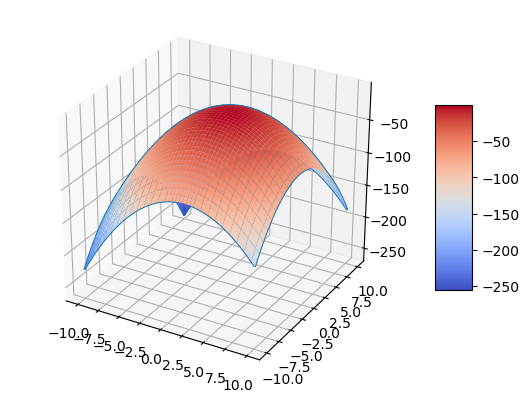

In [104]:
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
x, y = np.meshgrid(np.linspace(-10, 10), np.linspace(-10, 10))
z = f(x,y)
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.plot_wireframe(x, y, z, rstride=2, cstride=2)
ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=1)

fig

**Primjer 6.** Nađimo lokalne ekstreme funkcije $f(x,y,z,w) = 5(x-3)^3 + 9(y-2)^2 - 9(z+3)^3 - 11(w+2)^2$.

In [105]:
x,y,z,w = sp.symbols('x y z w')

def f(x,y,z,w):
    return 5*(x-3)**2 + 9*(y-2)**2 - 9*(z+3)**3 - 11*(w+2)**2

fsp = f(x,y,z,w)

g = grad(fsp,[x,y,z,w])
g

[10*x - 30, 18*y - 36, -27*(z + 3)**2, -22*w - 44]

In [106]:
stac_tocka = sp.solve(g, sp.symbols('x y z w'))
stac_tocka

[(3, 2, -3, -2)]

Jedini kandidat je točka $(3, 2, -3, -2)$.

In [107]:
h = hess(fsp,[x,y,z,w])
h    # ovisi o x i y

Matrix([
[10,  0,           0,   0],
[ 0, 18,           0,   0],
[ 0,  0, -54*z - 162,   0],
[ 0,  0,           0, -22]])

In [108]:
Delta1 = sp.lambdify((x,y,z,w),h[0,0])
Delta1(3,2,-3,-2)

10

In [109]:
h[0:2,0:2]

Matrix([
[10,  0],
[ 0, 18]])

In [110]:
temp = h[0:2,0:2].det()
Delta2 = sp.lambdify((x,y,z,w),temp)
Delta2(3,2,-3,-2)

180

In [111]:
h[0:3,0:3]

Matrix([
[10,  0,           0],
[ 0, 18,           0],
[ 0,  0, -54*z - 162]])

In [112]:
temp = h[0:3,0:3].det()
Delta3 = sp.lambdify((x,y,z,w),temp)
Delta3(3,2,-3,-2)

0

In [113]:
temp = h.det()
Delta4 = sp.lambdify((x,y,z,w),temp)
Delta4(3,2,-3,-2)

0

Imamo: $$\Delta _1 = 10 > 0$$
       $$\Delta _2 = 180 > 0$$
       $$\Delta _3 = 0 \ge 0$$
       $$\Delta _4 = 0 \ge 0$$
       
Slijedi da je $H_f(3,2,-3,2)$ pozitivno semidefinitna.

U $(3,2,-3,2)$ može biti lokalni minimum ili sedlasta točka.